In [ ]:
# Dự báo giá bitcoin bằng cách sử dụng LSTM

#### Thư viện để phân tích dữ liệu và thao tác:
- ** Numpy ** (`Numpy`) - Thư viện cơ bản để tính toán số trong Python, được sử dụng để phẫu thuật trên bảng và các vấn đề
- ** Pandas ** ('Pandas') - Cung cấp cấu trúc dữ liệu

#### Thư viện để trực quan hóa:
- ** matplotlib ** (`` matplotlib.plotot`) - tạo biểu đồ tuyến tính, phân tán và trực quan hóa dữ liệu khác
- ** Seaborn ** (`Seaborn`) - Mở rộng khả năng của matplotlib, cung cấp nhiều biểu đồ thẩm mỹ và nâng cao hơn

#### Khung để học sâu:
- ** Tensorflow ** (`` Tensorflow`) - Nền tảng để xây dựng và đào tạo các mô hình học tập sâu
- ** Keras ** (`TensorFlow.Keras`) - Giao diện API High -level cho TensorFlow, Đơn giản hóa các mô hình

#### Các lớp và mô hình Keras:
- ** dày đặc ** - một lớp tiêu chuẩn được kết nối hoàn toàn trong mạng lưới thần kinh
- ** LSTM ** - Lớp bộ nhớ ngắn hạn dài, Kiến trúc RNN chuyên dụng để xử lý chuỗi dữ liệu
- ** bỏ học ** - một hệ thống điều chỉnh mô hình ngăn chặn mô hình
- ** Batchmalization ** - Bình thường hóa các lớp đầu vào, ổn định và tăng tốc đào tạo
- ** tuần tự ** - cách dễ nhất để xây dựng một mô hình trong keras, các lớp được đặt tuyến tính

#### Callbacks:
- ** Earlystopping ** - Ngừng đào tạo khi mô hình ngừng cải thiện
- ** modelcheckpoint ** - lưu phiên bản tốt nhất của mô hình trong khi đào tạo

#### Các công cụ để chuẩn bị và đánh giá mô hình:
- ** MinMaxScaler ** - Dữ liệu tỷ lệ lên một phạm vi cụ thể (thường là [0.1]), cần thiết cho các mạng thần kinh
- ** mean_squared_error **, ** mean_absolute_error **, ** r2_score ** - bản ghi để đánh giá chất lượng
- ** Train_test_plit ** - Chia dữ liệu thành Bộ sưu tập đào tạo và kiểm tra

- ** DateTime ** - Mô -đun cho ngày và phẫu thuật thời gian, được sử dụng để chuyển đổi ngày thành điểm đánh dấu thời gian (dấu thời gian)


- **Xây dựng và tổng hợp mô hình LSTM:** Tạo kiến trúc mạng nơ-ron tuần tự (Sequential) với các lớp LSTM, BatchNormalization và Dropout để xử lý dữ liệu chuỗi thời gian và ngăn chặn overfitting. Biên dịch mô hình với trình tối ưu hóa Adam và hàm mất mát MSE.
- **Huấn luyện mô hình với ghi lại các đường cong học tập:** Huấn luyện mô hình trên tập huấn luyện, sử dụng EarlyStopping và ModelCheckpoint để theo dõi quá trình huấn luyện và lưu lại mô hình có hiệu suất tốt nhất trên tập xác thực. Trực quan hóa đường cong học tập để đánh giá chất lượng và phát hiện overfitting.
- **Đánh giá mô hình trên tập kiểm tra:** Sử dụng mô hình đã huấn luyện để dự báo trên tập kiểm tra, sau đó nghịch đảo tỷ lệ các giá trị dự báo về thang giá gốc. Tính toán các chỉ số đánh giá như MSE, MAE, RMSE và R² để đo lường độ chính xác của mô hình.

In [ ]:
# !pip install numpy pandas matplotlib seaborn tensorflow scikit-learn yfinance pycoingecko

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import datetime

## Tải xuống và thăm dò giá bitcoin

Trong phần này:
- Nhập dữ liệu bằng 1 file data csv
- Chúng tôi xử lý dữ liệu thành định dạng theo phần còn lại của mã
- Chúng tôi hiển thị số liệu thống kê cơ bản và thông tin dữ liệu
- Chúng tôi phân tích các bản ghi đầu tiên và cuối cùng để hiểu rõ hơn về cấu trúc dữ liệu
- Chúng tôi kiểm tra các loại dữ liệu trong bộ đã tải xuống


In [ ]:
import pandas as pd
# from google.colab import files # Không cần thiết khi đọc từ đường dẫn cố định
# import io # Không cần thiết khi đọc từ đường dẫn cố định

# Hàm lấy dữ liệu Bitcoin từ tệp CSV đã tải lên (đã sửa để đọc từ đường dẫn)
def get_bitcoin_data_from_csv(file_path):
    """
    Đọc dữ liệu giá Bitcoin từ tệp CSV tại đường dẫn được chỉ định.
    Tệp phải có các cột: 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'.
    """
    try:
        # Đọc tệp CSV vào DataFrame, sử dụng cột 'Date' làm chỉ mục
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

        # Đổi tên cột cho thống nhất (nếu cần, dựa vào tên cột trong CSV của bạn)
        # Các cột Open, High, Low, Close, Volume được mong đợi
        df = df.rename(columns={
            "Open": "Open",
            "High": "High",
            "Low": "Low",
            "Close": "Close",
            "Volume": "Volume"
        })

        # Bỏ các giá trị NaN (nếu có)
        df = df.dropna()

        return df
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp tại đường dẫn {file_path}")
        return None
    except Exception as e:
        print(f"Đã xảy ra lỗi khi đọc tệp CSV: {e}")
        return None

# Sử dụng hàm mới để tải dữ liệu từ đường dẫn CSV
file_path = '/bitcoin_data_max_1d.csv'
data = get_bitcoin_data_from_csv(file_path)

if data is not None:
    print(f"Đã tải dữ liệu từ: {file_path}")
    print(f"Số lượng dòng dữ liệu: {len(data)}")
    print(f"Khoảng thời gian: {data.index.min().date()} - {data.index.max().date()}")

    display(data.head())
    display(data.tail())
    print(data.dtypes)

else:
    print(f"Không thể tải dữ liệu từ tệp CSV tại đường dẫn {file_path}.")

Đã tải dữ liệu từ: /bitcoin_data_max_1d.csv
Số lượng dòng dữ liệu: 2089
Khoảng thời gian: 2020-01-01 - 2025-09-19


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095


,Open,High,Low,Close,Volume
Date,,,,,
2025-09-15 00:00:00+00:00,115399.632812,116747.882812,114461.062500,115444.875000,52937859416
2025-09-16 00:00:00+00:00,115423.757812,117005.273438,114813.093750,116843.187500,45781744593
2025-09-17 00:00:00+00:00,116840.507812,117328.609375,114794.976562,116468.507812,60528025996
2025-09-18 00:00:00+00:00,116461.265625,117911.789062,116188.796875,117137.203125,49457272032
2025-09-19 00:00:00+00:00,117113.453125,117465.429688,116732.164062,116861.945312,42808958976


Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


## Chuẩn bị dữ liệu để học mô hình LSTM

Trong phần này:
-
- Chúng tôi bình thường hóa dữ liệu giá vào phạm vi [0.1] bằng cách sử dụng 'MinMaxScaler'
- Chúng tôi sử dụng cửa sổ thời gian 14 ngày để dự đoán vào ngày hôm sau
- Chúng tôi chia dữ liệu thành các bộ đào tạo (80%) và kiểm tra (20%)
- Chuyển đổi dữ liệu thành định dạng đầu vào cần thiết cho các lớp LSTM (3D)


In [ ]:
def create_sequences(series, window_size=14):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(data['Close'].values.reshape(-1, 1)).flatten()

window_size = 14
X, y = create_sequences(scaled_prices, window_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_test: {y_test.shape}")

Kích thước X_train: (1660, 14, 1)
Kích thước y_train: (1660,)
Kích thước X_test: (415, 14, 1)
Kích thước y_test: (415,)


## Xây dựng và tổng hợp mô hình LSTM

Trong phần này:
- Chúng tôi tạo ra kiến ​​trúc nâng cao của mạng lưới thần kinh với nhiều lớp
- Chúng tôi sử dụng các lớp LSTM để xử lý chuỗi thời gian
- Chúng tôi bổ sung hàng loạt để ổn định đào tạo
- Chúng tôi sử dụng bỏ học (30%) làm kỹ thuật ngăn chặn sự bực tức
- Chúng tôi sử dụng chức năng kích hoạt reel cho các lớp dày đặc
- Chúng tôi biên dịch mô hình với trình tối ưu hóa Adam và Chức năng mất MSE


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                  │ (None, 14, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 14, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,785 (120.25 KB)

 Trainable params: 30,593 (119.50 KB)

 Non-trainable params: 192 (768.00 B)

## đào tạo một mô hình với ghi lại các đường cong học tập

Trong phần này:
- Chúng tôi thực hiện Earlistopping, sẽ ngừng đào tạo khi mô hình ngừng cải thiện
- Chúng tôi sử dụng modelcheckpoint để lưu phiên bản tốt nhất của mô hình
- Chúng tôi đào tạo mô hình tối đa 50 ERA với xác thực
- Chúng tôi sử dụng 20% ​​đào tạo làm bộ sưu tập xác nhận
- Chúng tôi đang hình dung các đường cong học tập để đánh giá chất lượng đào tạo và phát hiện một sự giám sát có thể


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 0.6067 - val_loss: 0.1450
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1619 - val_loss: 0.1297
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1116 - val_loss: 0.1256
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0919 - val_loss: 0.1160
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0719 - val_loss: 0.1139
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0697 - val_loss: 0.1084
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0593 - val_loss: 0.1027
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0592 - val_loss: 0.1013
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0467 - val_loss: 0.0989
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0417 - val_loss: 0.0976
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0391 - val_loss: 0.0889
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/ste

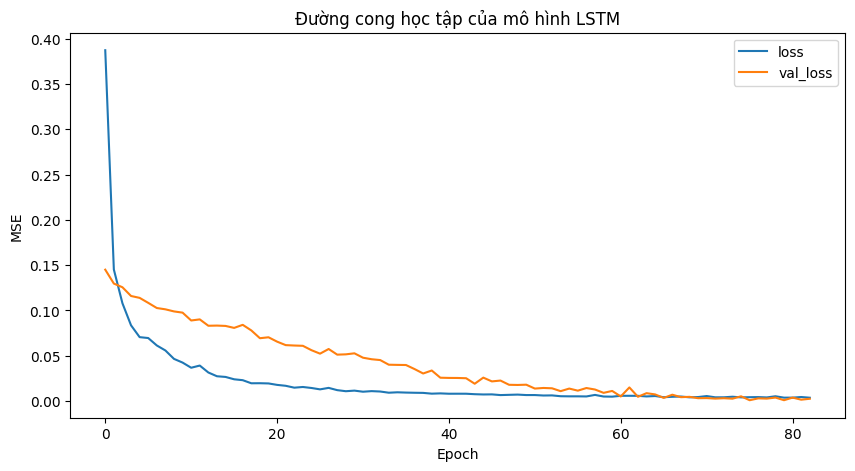

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_bitcoin_lstm.keras', save_best_only=True, monitor='val_loss')
]

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Đường cong học tập của mô hình LSTM')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Đánh giá mô hình trên tập kiểm tra

Trong phần này:
- Chúng tôi tạo dự báo trên tập kiểm tra
- Chúng tôi biến đổi các giá trị chuẩn hóa trở lại thang gốc (USD)
- Chúng tôi tính toán chất lượng chính của mô hình:
- MSE (Lỗi bình phương trung bình) - Lỗi bình phương trung bình
- MAE (Lỗi tuyệt đối trung bình) - Lỗi tuyệt đối trung bình
- RMSE (Lỗi bình phương trung bình gốc) - PierwiStek Z MSE
- R² (Yếu tố xác định) - Mô hình giải thích độ biến thiên của dữ liệu tốt như thế nào


In [ ]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred).flatten()

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
MSE: 11909202.77
MAE: 2582.76
RMSE: 3450.97
R2: 0.9864


## Trực quan hóa giá Bitcoin thực và dự báo

Trong phần này:
- Chúng tôi tạo ra một biểu đồ so sánh giá bitcoin thực sự và dự đoán
- Chúng tôi hiển thị 50 ngày qua từ bộ sưu tập thử nghiệm của chúng tôi
- Chúng tôi hình dung sự khác biệt giữa dự báo và thực tế bằng cách điền vào
- Chúng tôi thêm thông tin về lỗi MSE cho khoảng thời gian được hiển thị
- Chúng tôi định dạng biểu đồ với các mô tả, huyền thoại và mạng thích hợp để có thể đọc tốt hơn


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


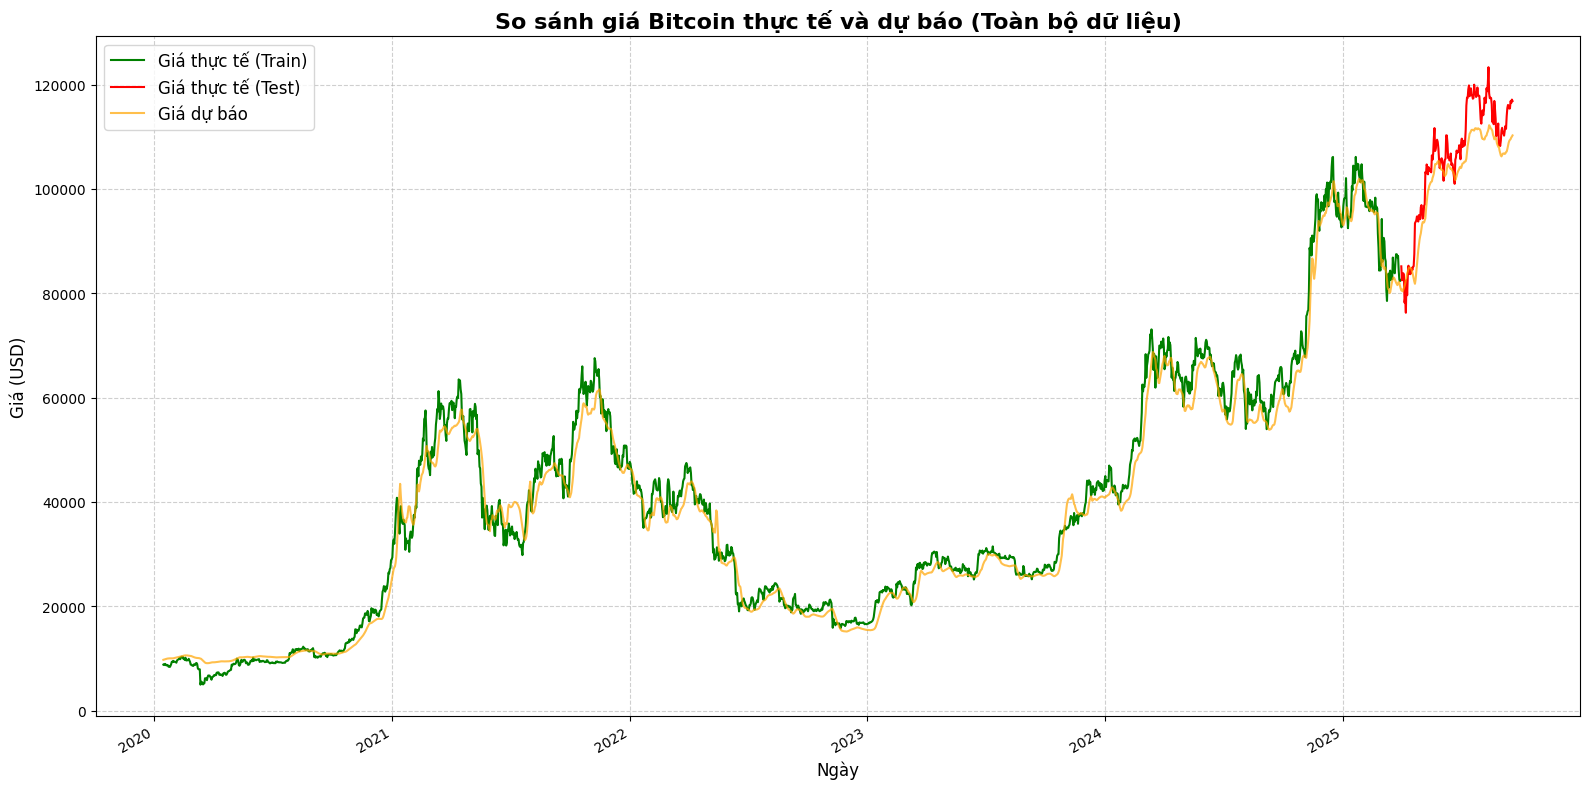

In [ ]:
# Tạo dự báo trên toàn bộ tập dữ liệu
# Đầu tiên, tạo lại dữ liệu X cho toàn bộ tập dữ liệu

# Scale the entire dataset using the scaler fitted on the training data
all_scaled_prices = scaler.transform(data['Close'].values.reshape(-1, 1)).flatten()
X_all, y_all = create_sequences(all_scaled_prices, window_size)
X_all = X_all[..., np.newaxis]

all_predictions_scaled = model.predict(X_all)
all_predictions_inv = scaler.inverse_transform(all_predictions_scaled).flatten()

# Lấy giá trị thực tế tương ứng
actual_prices_inv = scaler.inverse_transform(y_all.reshape(-1, 1)).flatten()

# Lấy ngày tương ứng cho các giá trị dự báo và thực tế
prediction_dates = data.index[window_size:].tolist()

# Determine the split point between training and test data in the prediction_dates
# Assuming the test data starts immediately after the training data in the original 'data' DataFrame
train_split_index_in_predictions = len(data_train) - window_size

plt.figure(figsize=(16, 8))

# Plot actual training prices (green)
plt.plot(prediction_dates[:train_split_index_in_predictions],
         actual_prices_inv[:train_split_index_in_predictions],
         'g-', linewidth=1.5, label='Giá thực tế (Train)')

# Plot actual test prices (red)
plt.plot(prediction_dates[train_split_index_in_predictions:],
         actual_prices_inv[train_split_index_in_predictions:],
         'r-', linewidth=1.5, label='Giá thực tế (Test)')

# Plot predicted prices (orange)
plt.plot(prediction_dates, all_predictions_inv, 'orange', linewidth=1.5, label='Giá dự báo', alpha=0.7)


plt.title('So sánh giá Bitcoin thực tế và dự báo (Toàn bộ dữ liệu)', fontsize=16, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gcf().autofmt_xdate()
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

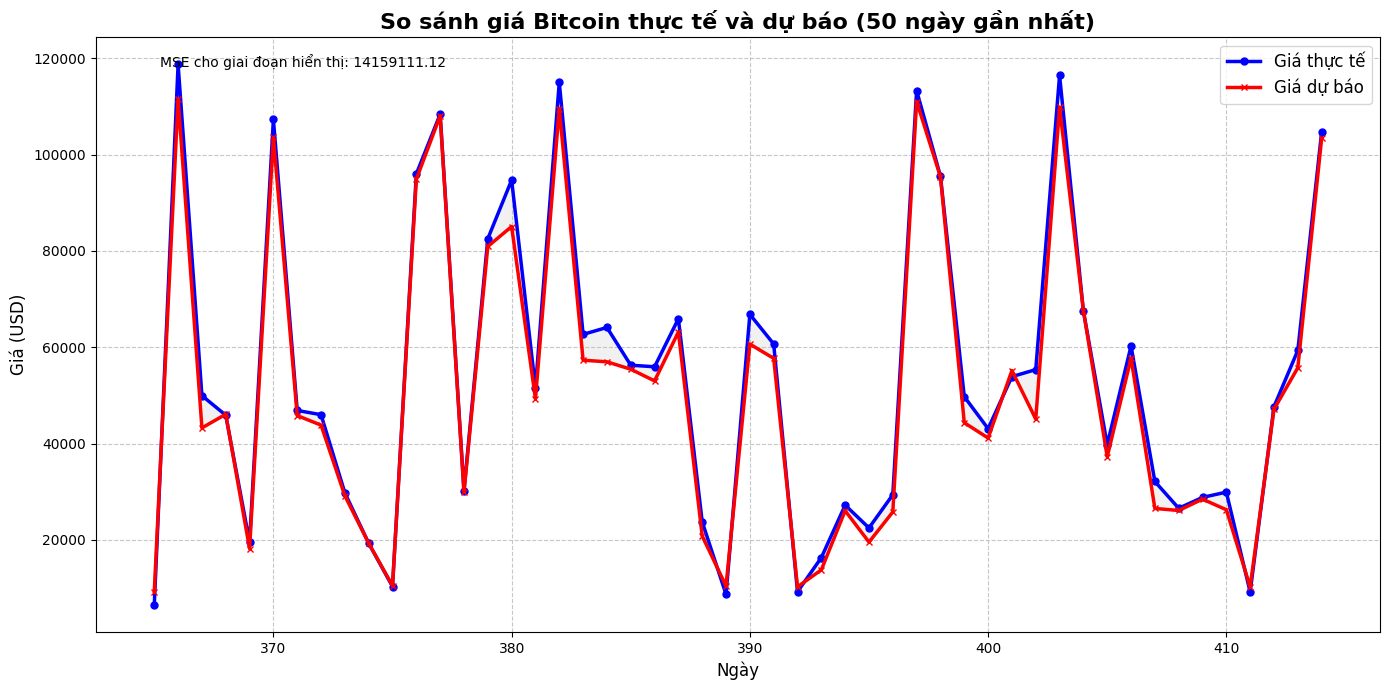

In [ ]:
days_to_show = 50
sample_indices = range(len(y_test_inv) - min(days_to_show, len(y_test_inv)), len(y_test_inv))

plt.figure(figsize=(14, 7))
plt.plot(sample_indices, y_test_inv[sample_indices],
         'b-', linewidth=2.5, label='Giá thực tế', marker='o', markersize=5)
plt.plot(sample_indices, y_pred_inv[sample_indices],
         'r-', linewidth=2.5, label='Giá dự báo', marker='x', markersize=5)

# Thêm vùng tô giữa các đường để trực quan hóa sự khác biệt tốt hơn
plt.fill_between(sample_indices, y_test_inv[sample_indices], y_pred_inv[sample_indices],
                 color='lightgray', alpha=0.3)

# Đặt phạm vi trục Y thực tế hơn
min_price = min(min(y_test_inv[sample_indices]), min(y_pred_inv[sample_indices]))
max_price = max(max(y_test_inv[sample_indices]), max(y_pred_inv[sample_indices]))
# Thêm lề 5% ở dưới và trên
y_min = min_price - (max_price - min_price) * 0.05
y_max = max_price + (max_price - min_price) * 0.05
plt.ylim(y_min, y_max)

plt.title('So sánh giá Bitcoin thực tế và dự báo (50 ngày gần nhất)',
          fontsize=16, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

sample_mse = mean_squared_error(y_test_inv[sample_indices], y_pred_inv[sample_indices])
plt.annotate(f'MSE cho giai đoạn hiển thị: {sample_mse:.2f}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

## Dự báo giá bitcoin cho ngày hôm sau

Trong phần này:
- Chúng tôi sử dụng 14 ngày qua của dữ liệu làm cửa sổ đầu vào
- Chúng tôi tạo dự báo giá bitcoin cho ngày hôm sau
- Chúng tôi đang hình dung giá thực tế cuối cùng và dự báo của chúng tôi trên biểu đồ
- Chúng tôi phân biệt điểm dự báo với định dạng và chú thích đặc biệt
- Chúng tôi hiển thị giá trị dự báo ở dạng văn bản


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


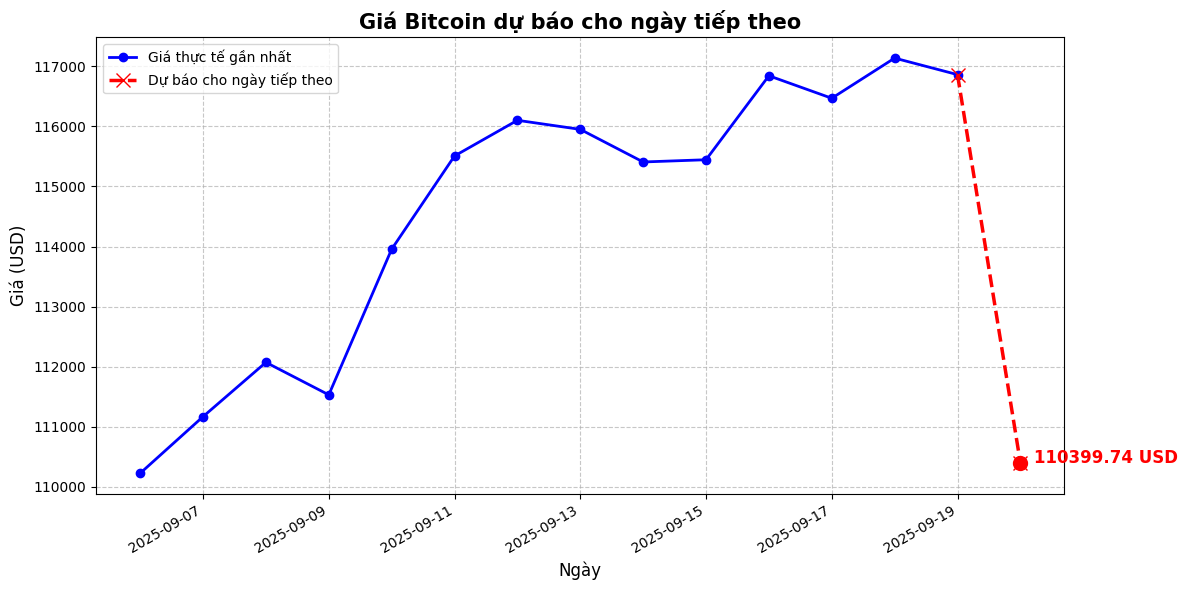

Giá Bitcoin dự báo cho ngày tiếp theo: 110399.74 USD


In [ ]:
last_days = data['Close'].values[-window_size:]
last_days_scaled = scaler.transform(np.array(last_days).reshape(-1, 1)).flatten()
X_next = np.array(last_days_scaled).reshape(1, window_size, 1)
next_price_scaled = model.predict(X_next)[0][0]
next_price = scaler.inverse_transform([[next_price_scaled]])[0][0]

dates = data.index[-window_size:].tolist()
next_date = dates[-1] + pd.Timedelta(days=1)

last_days_plot = list(last_days)
last_days_plot.append(next_price)
dates_plot = dates + [next_date]

plt.figure(figsize=(12, 6))

plt.plot(dates_plot[:-1], last_days_plot[:-1], 'b-', marker='o', linewidth=2,
         markersize=6, label='Giá thực tế gần nhất')

forecast_dates = [dates_plot[-2], dates_plot[-1]]
forecast_prices = [float(last_days_plot[-2]), float(last_days_plot[-1])]
plt.plot(forecast_dates, forecast_prices, 'r--', linewidth=2.5, marker='x',
         markersize=10, label='Dự báo cho ngày tiếp theo')

plt.scatter(dates_plot[-1], last_days_plot[-1], color='red', s=100, zorder=5)

plt.annotate(f'{next_price:.2f} USD',
             xy=(dates_plot[-1], last_days_plot[-1]),
             xytext=(10, 0), textcoords='offset points',
             fontsize=12, fontweight='bold', color='red')

plt.title('Giá Bitcoin dự báo cho ngày tiếp theo', fontsize=15, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.legend(loc='best')
plt.show()

print(f"Giá Bitcoin dự báo cho ngày tiếp theo: {next_price:.2f} USD")

## Dự báo giá bitcoin trong 10 ngày

Trong phần này:
- Chúng tôi tạo dự báo trong 10 ngày nữa bằng phương pháp bước
- Mỗi dự báo trở thành một phần của dữ liệu đầu vào cho dự báo tiếp theo
- Chúng tôi đang hình dung dữ liệu và dự báo lịch sử trên một biểu đồ
- Chúng tôi thêm một dòng trong suốt phân tách dữ liệu lịch sử với dự báo
- Chúng tôi hiển thị các giá trị giá cụ thể cho mỗi ngày dự báo
- Chúng tôi tính toán tỷ lệ phần trăm thay đổi giữa dự báo đầu tiên và lần cuối cùng


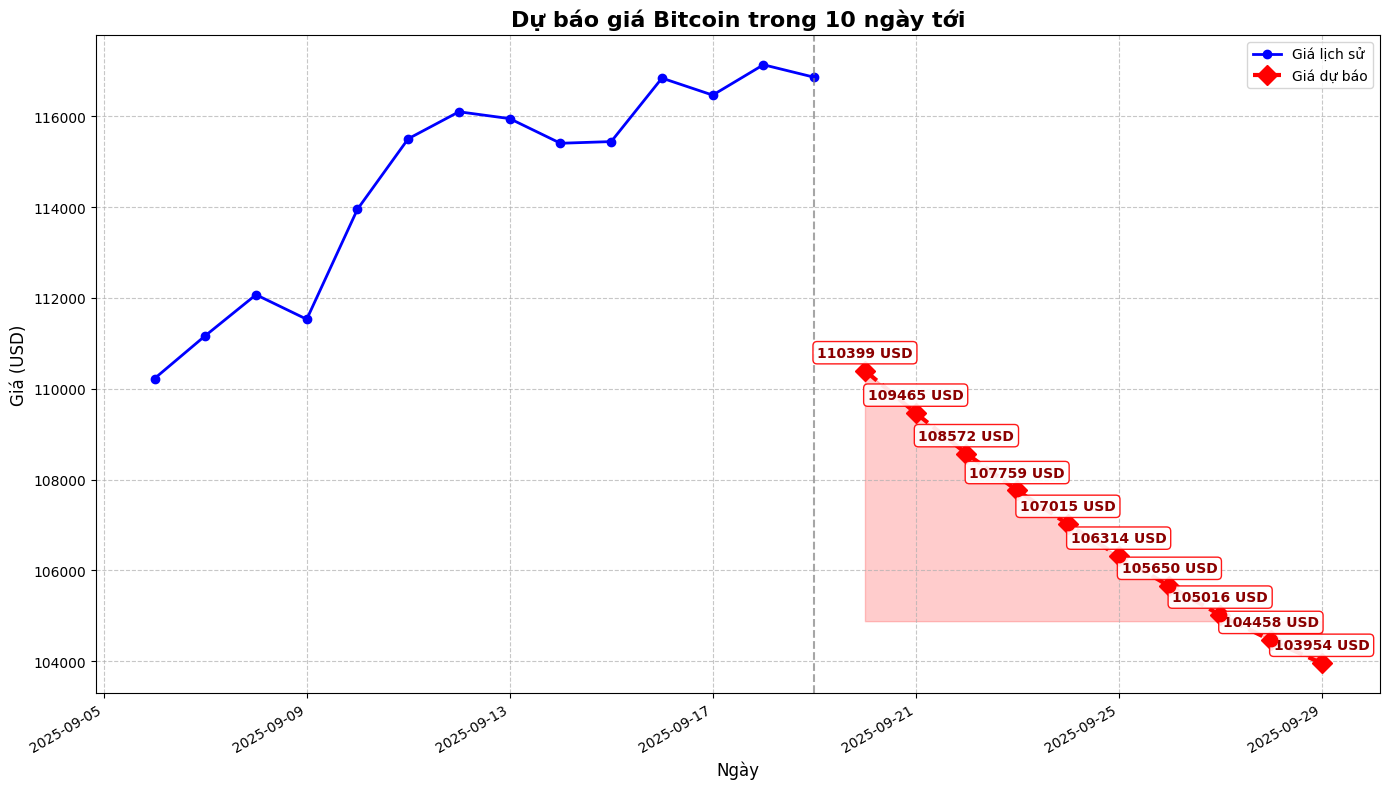

In [ ]:
days_to_predict = 10

last_window = data['Close'].values[-window_size:].copy()
current_date = data.index[-1]

future_dates = []
future_prices = []

for i in range(days_to_predict):
    x_input = scaler.transform(last_window.reshape(-1, 1)).flatten()
    x_input = np.array(x_input).reshape(1, window_size, 1)

    price_scaled = model.predict(x_input, verbose=0)[0][0]
    predicted_price = scaler.inverse_transform([[price_scaled]])[0][0]

    current_date = current_date + pd.Timedelta(days=1)
    future_dates.append(current_date)
    future_prices.append(predicted_price)

    last_window = np.append(last_window[1:], predicted_price)

historical_dates = data.index[-window_size:].tolist()
historical_prices = data['Close'].values[-window_size:].tolist()

plt.figure(figsize=(14, 8))

plt.plot(historical_dates, historical_prices, 'b-', marker='o', linewidth=2,
         markersize=6, label='Giá lịch sử')

plt.plot(future_dates, future_prices, 'r--', linewidth=3, marker='D',
         markersize=10, label='Giá dự báo', zorder=3)

plt.axvline(x=historical_dates[-1], color='gray', linestyle='--', alpha=0.7)

last_historical_price = historical_prices[-1]
if isinstance(last_historical_price, list):
    last_historical_price = last_historical_price[0]
last_historical_price = float(last_historical_price)

first_prediction_price = float(future_prices[0])

min_price = min(last_historical_price, first_prediction_price) * 0.95
fill_bottom = np.full(len(future_dates), min_price)

future_prices_array = np.array(future_prices, dtype=float)

plt.fill_between(future_dates, fill_bottom, future_prices_array, alpha=0.2, color='red')

for i, (date, price) in enumerate(zip(future_dates, future_prices)):
    plt.annotate(f'{int(price)} USD',
                 xy=(date, price),
                 xytext=(0, 10),
                 textcoords='offset points',
                 fontsize=10,
                 fontweight='bold',
                 color='darkred',
                 ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.9))

plt.scatter(future_dates, future_prices, color='red', s=80, zorder=4)

plt.title('Dự báo giá Bitcoin trong 10 ngày tới', fontsize=16, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()
plt.legend(loc='best')
plt.tight_layout()
plt.show()

last_known_price = float(data['Close'].iloc[-1])
future_price_final = float(future_prices[-1])
total_change_percent = (future_price_final - last_known_price) / last_known_price * 100

first_prediction = float(future_prices[0])
last_prediction = float(future_prices[-1])
prediction_change_percent = (last_prediction - first_prediction) / first_prediction * 100

## Kiểm tra mô hình trên dữ liệu lịch sử

Trong phần này:
- Chúng tôi tạo ra một chức năng để kiểm tra tính hiệu quả của mô hình trong giai đoạn lịch sử được chọn
- Chúng tôi chọn ngẫu nhiên ngày từ quá khứ và tạo dự báo trước 10 ngày
- Chúng tôi so sánh dự báo với giá thực xảy ra trong giai đoạn này
- Chúng tôi đang hình dung sự khác biệt giữa dự báo và thực tế
- Chúng tôi tính toán các bản ghi lỗi (RMSE, MAE, MAPE) để dự báo
- Chúng tôi phân tích mô hình dự đoán hướng thay đổi giá tốt như thế nào
- Chúng tôi hiển thị một bảng so sánh chi tiết cho mỗi ngày dự báo


Kiểm tra dự báo từ ngày: 2020-08-24
Sử dụng dữ liệu lịch sử từ 14 ngày trước


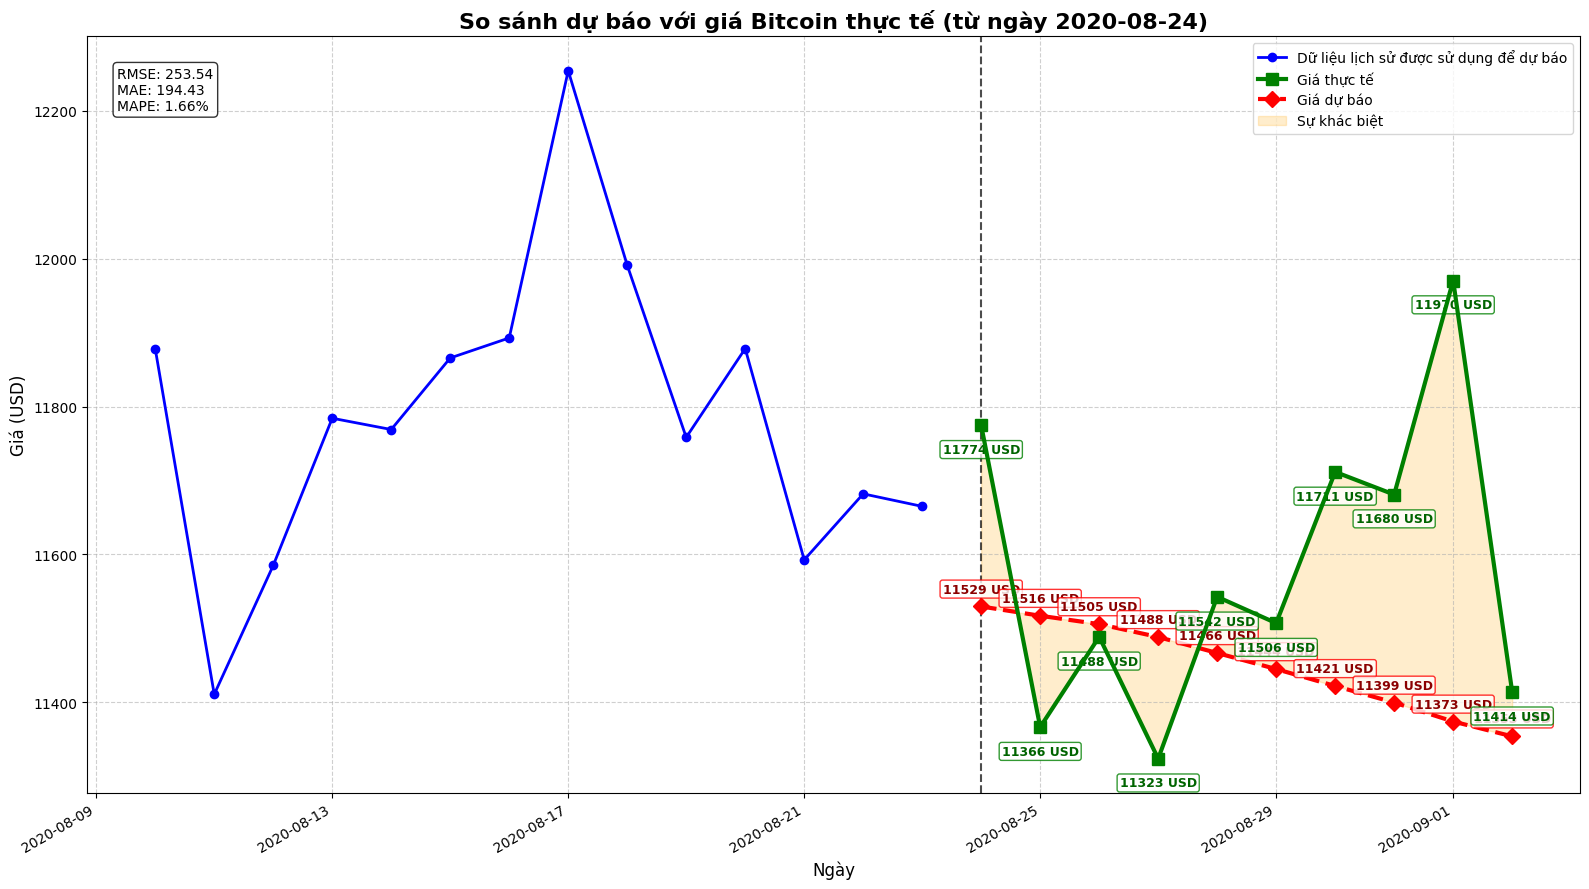


Bảng so sánh dự báo với giá thực tế:
Ngày 1: 2020-08-24 - Dự báo: 11529 USD, Thực tế: 11774 USD, Chênh lệch: -245 USD (-2.08%)
Ngày 2: 2020-08-25 - Dự báo: 11516 USD, Thực tế: 11366 USD, Chênh lệch: 150 USD (1.33%)
Ngày 3: 2020-08-26 - Dự báo: 11505 USD, Thực tế: 11488 USD, Chênh lệch: 17 USD (0.15%)
Ngày 4: 2020-08-27 - Dự báo: 11488 USD, Thực tế: 11323 USD, Chênh lệch: 164 USD (1.45%)
Ngày 5: 2020-08-28 - Dự báo: 11466 USD, Thực tế: 11542 USD, Chênh lệch: -76 USD (-0.66%)
Ngày 6: 2020-08-29 - Dự báo: 11444 USD, Thực tế: 11506 USD, Chênh lệch: -62 USD (-0.54%)
Ngày 7: 2020-08-30 - Dự báo: 11421 USD, Thực tế: 11711 USD, Chênh lệch: -289 USD (-2.47%)
Ngày 8: 2020-08-31 - Dự báo: 11399 USD, Thực tế: 11680 USD, Chênh lệch: -281 USD (-2.41%)
Ngày 9: 2020-09-01 - Dự báo: 11373 USD, Thực tế: 11970 USD, Chênh lệch: -596 USD (-4.99%)
Ngày 10: 2020-09-02 - Dự báo: 11353 USD, Thực tế: 11414 USD, Chênh lệch: -60 USD (-0.53%)

Sai số phần trăm tuyệt đối trung bình (MAPE): 1.66%
Thay đổi dự báo sa

{'mape': np.float64(1.6608873083129385),
 'pred_change': np.float64(-1.524163405460861),
 'actual_change': np.float64(-3.0621987584831154),
 'final_error_pct': np.float64(-0.528943870978921)}

In [ ]:
def test_bitcoin_prediction(data, model, scaler, window_size, random_seed=None):

    if random_seed is not None:
        np.random.seed(random_seed)

    test_period = 10

    min_index = window_size + 20
    max_index = len(data) - test_period - 20
    past_date_index = np.random.randint(min_index, max_index)
    past_date = data.index[past_date_index]

    print(f"Kiểm tra dự báo từ ngày: {past_date.date()}")
    print(f"Sử dụng dữ liệu lịch sử từ {window_size} ngày trước")

    historical_window = data['Close'].values[past_date_index - window_size:past_date_index].copy()
    future_actual_prices = data['Close'].values[past_date_index:past_date_index + test_period]
    future_actual_dates = data.index[past_date_index:past_date_index + test_period]

    test_future_dates = []
    test_future_prices = []
    current_window = historical_window.copy()

    for i in range(test_period):
        x_input = scaler.transform(current_window.reshape(-1, 1)).flatten()
        x_input = np.array(x_input).reshape(1, window_size, 1)

        price_scaled = model.predict(x_input, verbose=0)[0][0]
        predicted_price = scaler.inverse_transform([[price_scaled]])[0][0]

        current_date = data.index[past_date_index + i]
        test_future_dates.append(current_date)
        test_future_prices.append(predicted_price)

        current_window = np.append(current_window[1:], predicted_price)

    test_future_prices = np.array(test_future_prices).flatten()
    future_actual_prices = np.array(future_actual_prices).flatten()

    plt.figure(figsize=(16, 9))

    historical_dates = data.index[past_date_index - window_size:past_date_index].tolist()
    historical_prices = data['Close'].values[past_date_index - window_size:past_date_index].tolist()
    plt.plot(historical_dates, historical_prices, 'b-', marker='o', linewidth=2,
             markersize=6, label='Dữ liệu lịch sử được sử dụng để dự báo')

    plt.plot(future_actual_dates, future_actual_prices, 'g-', marker='s', linewidth=3,
             markersize=8, label='Giá thực tế', zorder=4)

    plt.plot(test_future_dates, test_future_prices, 'r--', linewidth=3, marker='D',
             markersize=8, label='Giá dự báo', zorder=3)

    plt.fill_between(test_future_dates, test_future_prices, future_actual_prices,
                     color='orange', alpha=0.2, label='Sự khác biệt')

    for i, (date, pred, actual) in enumerate(zip(test_future_dates, test_future_prices, future_actual_prices)):
        plt.annotate(f'{int(pred)} USD',
                     xy=(date, pred),
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=9,
                     fontweight='bold',
                     color='darkred',
                     ha='center',
                     bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.8))

        plt.annotate(f'{int(actual)} USD',
                     xy=(date, actual),
                     xytext=(0, -20),
                     textcoords='offset points',
                     fontsize=9,
                     fontweight='bold',
                     color='darkgreen',
                     ha='center',
                     bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='green', alpha=0.8))

    plt.axvline(x=past_date, color='black', linestyle='--', alpha=0.7)

    plt.title(f'So sánh dự báo với giá Bitcoin thực tế (từ ngày {past_date.date()})',
              fontsize=16, fontweight='bold')
    plt.xlabel('Ngày', fontsize=12)
    plt.ylabel('Giá (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gcf().autofmt_xdate()
    plt.legend(loc='best')
    plt.tight_layout()

    mse = mean_squared_error(future_actual_prices, test_future_prices)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(future_actual_prices, test_future_prices)

    mape = np.mean(np.abs((future_actual_prices - test_future_prices) / future_actual_prices)) * 100

    info_text = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%'
    plt.annotate(info_text, xy=(0.02, 0.96), xycoords='axes fraction',
                 bbox=dict(boxstyle='round', fc='white', ec='black', alpha=0.8),
                 fontsize=10, va='top')

    plt.show()

    print("\nBảng so sánh dự báo với giá thực tế:")
    for i, (date, pred, actual) in enumerate(zip(test_future_dates, test_future_prices, future_actual_prices)):
        diff = pred - actual
        diff_percent = (diff / actual) * 100
        print(f"Ngày {i+1}: {date.date()} - Dự báo: {int(pred)} USD, Thực tế: {int(actual)} USD, " +
              f"Chênh lệch: {int(diff)} USD ({diff_percent:.2f}%)")

    final_diff = test_future_prices[-1] - future_actual_prices[-1]
    final_diff_percent = (final_diff / future_actual_prices[-1]) * 100

    pred_change = ((test_future_prices[-1] - test_future_prices[0]) / test_future_prices[0] * 100)
    actual_change = ((future_actual_prices[-1] - future_actual_prices[0]) / future_actual_prices[0] * 100)

    print(f"\nSai số phần trăm tuyệt đối trung bình (MAPE): {mape:.2f}%")
    print(f"Thay đổi dự báo sau 10 ngày: {pred_change:.2f}%")
    print(f"Thay đổi thực tế sau 10 ngày: {actual_change:.2f}%")
    print(f"Sai số dự báo vào ngày thứ 10: {final_diff_percent:.2f}%")

    return {
        'mape': mape,
        'pred_change': pred_change,
        'actual_change': actual_change,
        'final_error_pct': final_diff_percent
    }

test_bitcoin_prediction(data, model, scaler, window_size)